In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

Llegim el data set de la llibreria APA fib

In [104]:
import apafib
data = apafib.load_column()
target_names=['DH', 'SL', 'NO']

In [4]:
data.head()

(310, 7)

Veiem els valor que prenen les variables. Podem veure, per exemple, que no tenim cap valor perdut

In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,NaN,NaN,NaN,60.496484,17.236109,26.15,46.4325,58.69,72.88,129.83
pelvic_tilt,310.0,NaN,NaN,NaN,17.542903,10.00814,-6.55,10.6675,16.36,22.12,49.43
lumbar_lordosis_angle,310.0,NaN,NaN,NaN,51.93071,18.553766,14.0,37.0,49.565,63.0,125.74
sacral_slope,310.0,NaN,NaN,NaN,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43
pelvic_radius,310.0,NaN,NaN,NaN,117.920548,13.317629,70.08,110.71,118.265,125.4675,163.07
degree_spondylolisthesis,310.0,NaN,NaN,NaN,26.296742,37.558883,-11.06,1.6,11.765,41.285,418.54
class,310,3,SL,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aqui podem veure la distribucio de les dades.
Sembla que algunes de les variables podrien ser gausianes, encara que sembla que podem tenir algun outlier, com per exemple el valor de 120 en la columna de *sacral_slope*

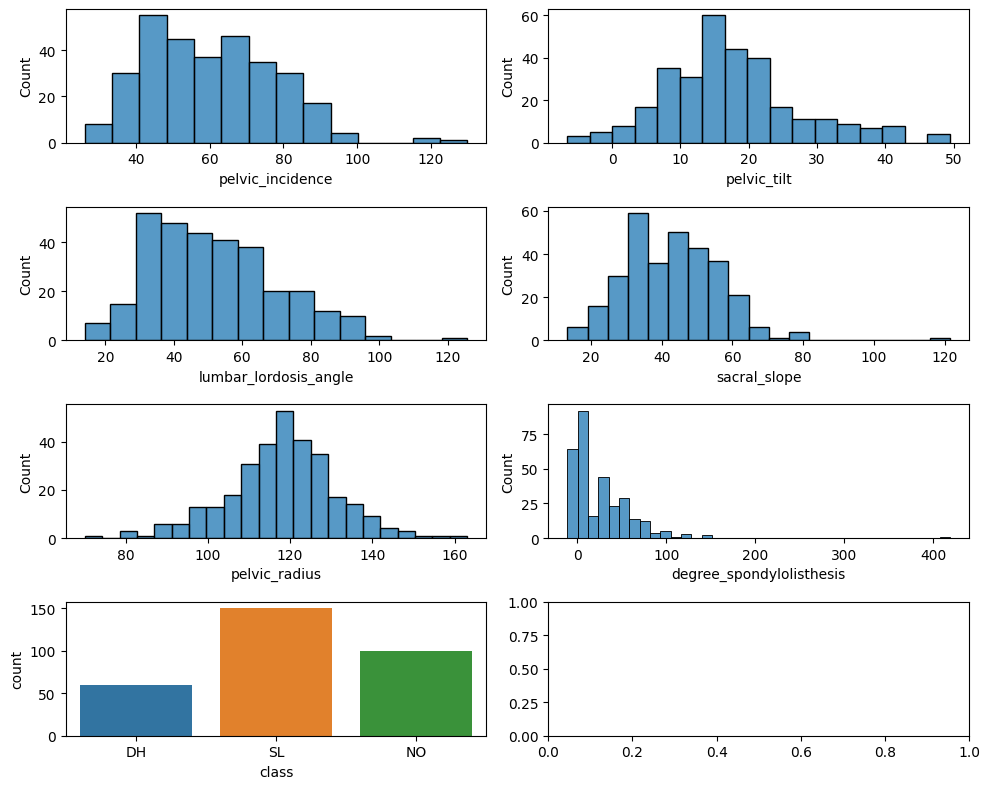

In [15]:
fig, axes = plt.subplots(4,2,figsize=(10,8))
for i, c in enumerate(data.columns[:15]):
    ax = axes.reshape(-1)[i]
    if data[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data,ax=ax)
    else:
        b = sns.histplot(x=c,data=data,ax=ax)
plt.tight_layout()

In [53]:
X = data.drop('class',axis=1)
y = data['class']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  ConfusionMatrixDisplay,\
                    classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_s,y_train)
print(np.mean(cross_val_score(lr,X_train_s,y_train,cv=10)))

param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_s, y_train)

0.8019480519480519


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.99526231e-03, 3.98107171e-03, 7.94328235e-03,
       1.58489319e-02, 3.16227766e-02, 6.30957344e-02, 1.25892541e-01,
       2.51188643e-01, 5.01187234e-01, 1.00000000e+00, 1.99526231e+00,
       3.98107171e+00, 7.94328235e+00, 1.58489319e+01, 3.16227766e+01,
       6.30957344e+01, 1.25892541e+02, 2.51188643e+02, 5.01187234e+02,
       1.00000000e+03]),
                         'penalty': ['l2']})

In [83]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
16,"{'C': 63.0957344480193, 'penalty': 'l2'}",0.884632,1
20,"{'C': 1000.0, 'penalty': 'l2'}",0.884416,2
18,"{'C': 251.18864315095772, 'penalty': 'l2'}",0.884416,2
17,"{'C': 125.89254117941663, 'penalty': 'l2'}",0.884416,2
19,"{'C': 501.18723362727246, 'penalty': 'l2'}",0.884416,2


In [98]:
from sklearn.svm import SVC
param = {'C':10**np.linspace(-3,3,101)}

psvc = SVC(kernel='poly', max_iter=1000000, random_state=0)
psvc_gs = GridSearchCV(psvc,param,cv=5, n_jobs=-1, refit=True)
psvc_gs.fit(X_train_s, y_train)

rsvc = SVC(kernel='rbf', max_iter=1000000, random_state=0)
rsvc_gs = GridSearchCV(rsvc,param,cv=5, n_jobs=-1, refit=True)
rsvc_gs.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=1000000, random_state=0), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.14815362e-03, 1.31825674e-03, 1.51356125e-03,
       1.73780083e-03, 1.99526231e-03, 2.29086765e-03, 2.63026799e-03,
       3.01995172e-03, 3.46736850e-03, 3.98107171e-03, 4.57088190e-03,
       5.24807460e-03, 6.02559586e-03, 6.91830971e-03, 7.94328235e-03,
       9.12010839e-...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03])})

In [99]:
show_html(pd.DataFrame(psvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())
show_html(pd.DataFrame(rsvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
43,{'C': 0.38018939632056126},0.879810,1
34,{'C': 0.1096478196143185},0.875264,2
30,{'C': 0.0630957344480193},0.875264,2
41,{'C': 0.28840315031266056},0.875159,4
42,{'C': 0.3311311214825911},0.875159,4


,params,mean_test_score,rank_test_score
50,{'C': 1.0},0.879915,1
51,{'C': 1.1481536214968828},0.875264,2
61,{'C': 4.570881896148747},0.870613,3
52,{'C': 1.3182567385564075},0.870507,4
59,{'C': 3.4673685045253166},0.870507,4


In [107]:
print(classification_report(rsvc_gs.predict(X_test_s), y_test,target_names=target_names))

              precision    recall  f1-score   support

          DH       0.45      0.56      0.50        16
          SL       0.74      0.62      0.68        32
          NO       0.96      0.98      0.97        45

    accuracy                           0.78        93
   macro avg       0.72      0.72      0.71        93
weighted avg       0.80      0.78      0.79        93



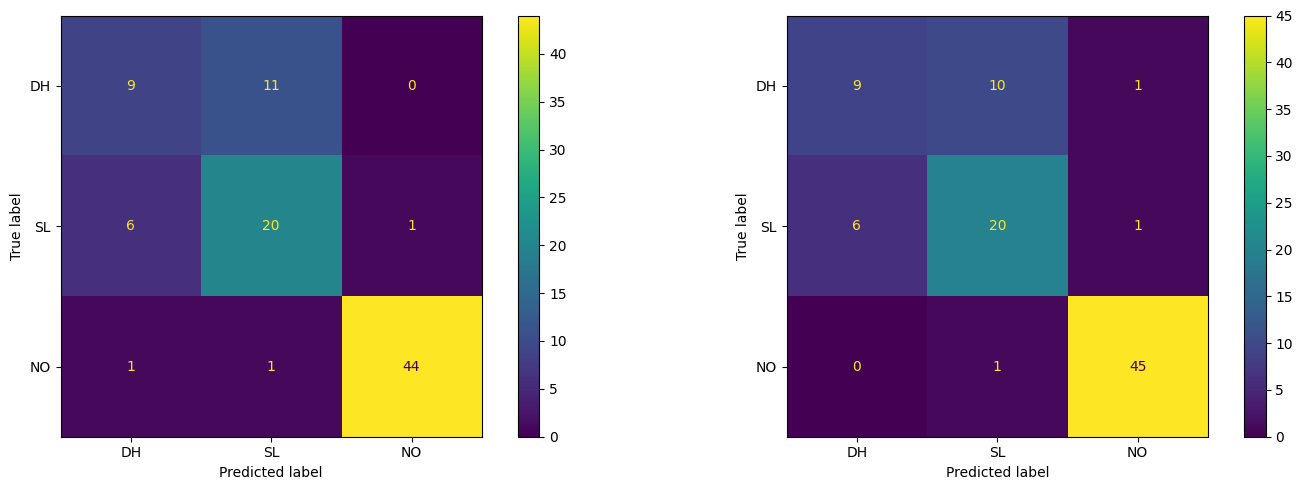

In [109]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax = axes.reshape(-1)[0]
ConfusionMatrixDisplay.from_estimator(rsvc_gs, X_test_s, y_test, display_labels=target_names, ax=ax)
ax = axes.reshape(-1)[1]
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test_s, y_test, display_labels=target_names, ax=ax)
plt.tight_layout()

In [110]:
from yellowbrick.classifier.rocauc import roc_auc


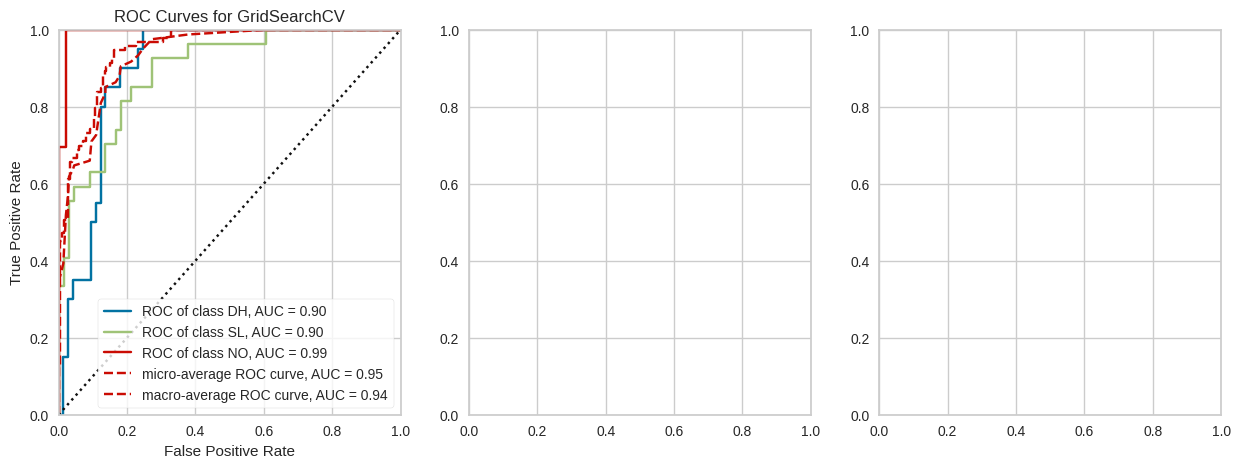

AxesSubplot(0.398529,0.11;0.227941x0.77)


<Figure size 800x550 with 0 Axes>

In [122]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
ax = axes.reshape(-1)[0]
roc_auc(rsvc_gs, X_train_s, y_train, X_test_s, y_test, classes=target_names, ax = ax)
ax = axes.reshape(-1)[1]
roc_auc(lr_gs, X_train_s, y_train, X_test_s, y_test, classes=target_names, ax = ax)
plt.tight_layout()